In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# deviding dtat into numaric and catagorical
train_numaric = train[['Age', 'SibSp','Parch','Fare']]
train_cat = train[['Survived','Sex','Pclass','Embarked']]

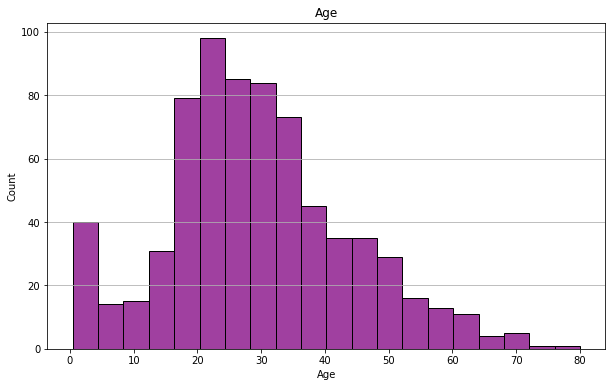

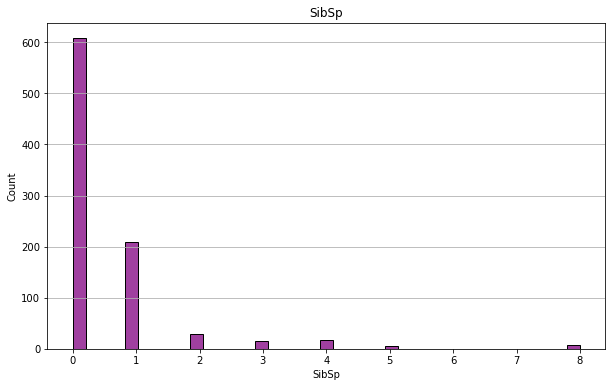

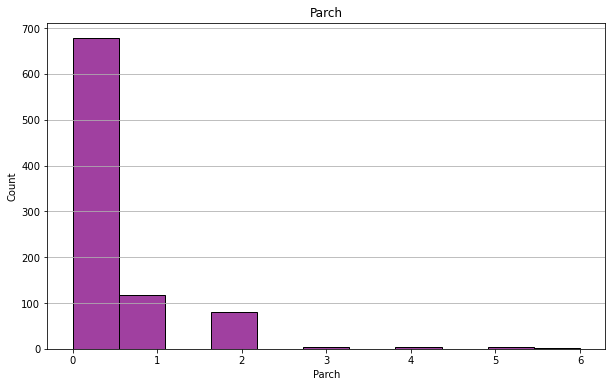

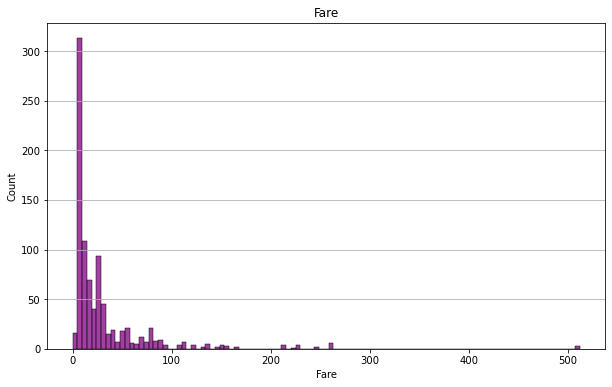

In [8]:
for i in train_numaric:
    plt.figure(figsize=(10,6))
    plt.grid(axis='y')
    sns.histplot(train_numaric[i],color = 'purple')
    plt.title(i)
    plt.show()

<AxesSubplot:>

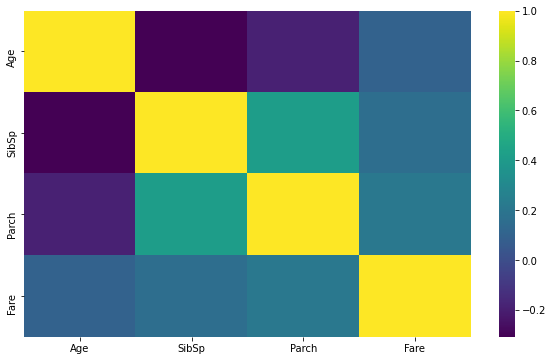

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(train_numaric.corr(),cmap = 'viridis')

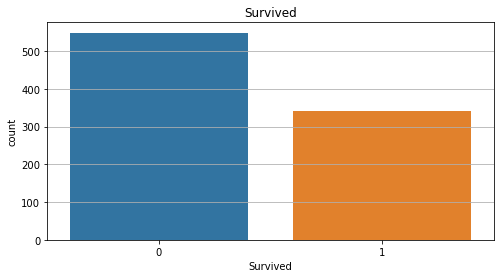

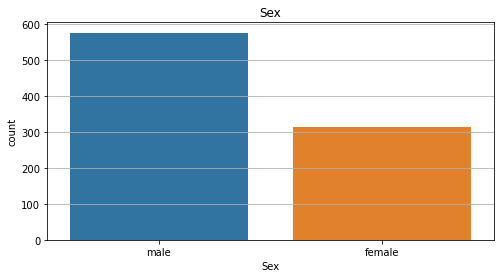

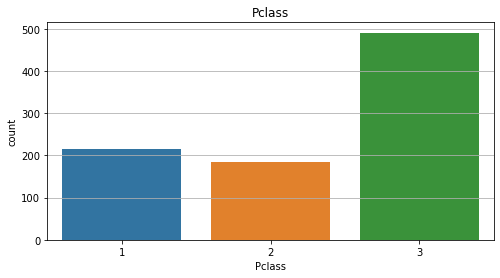

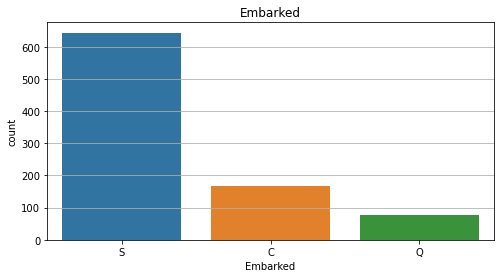

In [10]:
for i in train_cat:
    plt.figure(figsize=(8,4))
    sns.countplot(x = i,data = train_cat)
    plt.title(i)
    plt.grid(axis='y')
    plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

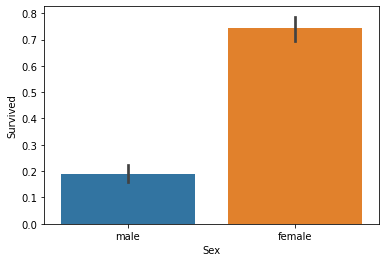

In [11]:
sns.barplot(x = 'Sex', y = 'Survived',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

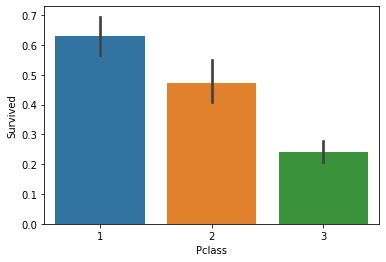

In [12]:
sns.barplot(x = 'Pclass', y = 'Survived',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

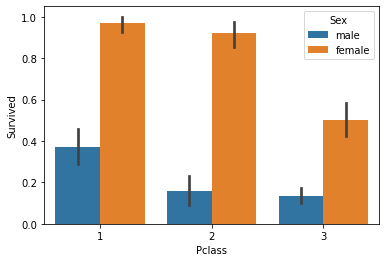

In [13]:
sns.barplot(x = 'Pclass', y = 'Survived',data=train,hue = 'Sex')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

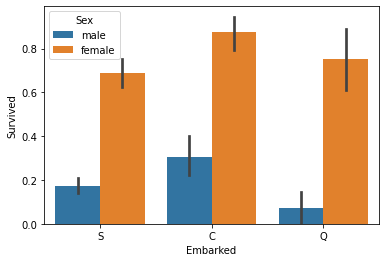

In [14]:
sns.barplot(x = 'Embarked', y = 'Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

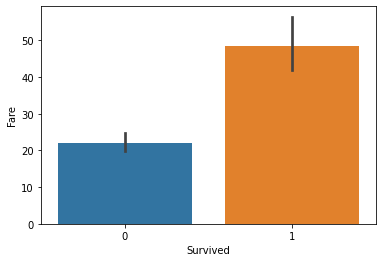

In [15]:
sns.barplot(y = 'Fare', x = 'Survived',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

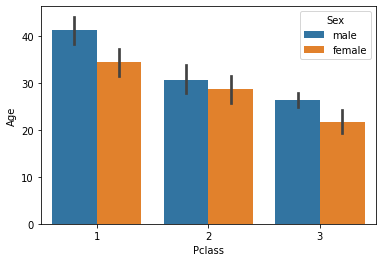

In [16]:
sns.barplot(y = 'Age', x = 'Pclass',data=train,hue = 'Sex')

### cleaning data

<AxesSubplot:>

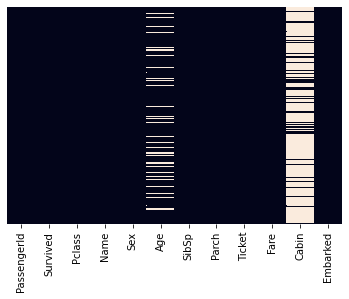

In [17]:
# missing data
sns.heatmap(train.isna(),yticklabels=False,cbar=False)

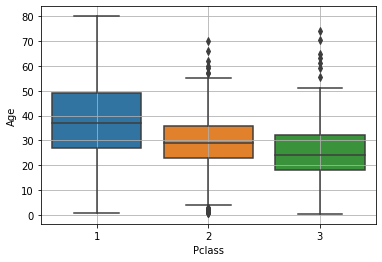

In [18]:
# to get avg age in each class
sns.boxplot(x = 'Pclass', y = 'Age',data=train)
plt.grid()

In [19]:
# function to impute the avg age for each class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [20]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [21]:
train.drop('Cabin',axis=1,inplace=True)

In [22]:
train.dropna(inplace=True)

In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [24]:
train = pd.concat([train, sex, embark],axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [26]:
X = train.drop(['PassengerId','Name','Sex','Ticket','Embarked','Survived'],axis=1)
y = train['Survived']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(f'Accuracy of the maodel is: {accuracy_score(y_test,prediction)*100} %')

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       141
           1       0.69      0.71      0.70        82

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



[[115  26]
 [ 24  58]]


Accuracy of the maodel is: 77.57847533632287 %


In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(f'Accuracy of the maodel is: {accuracy_score(y_test,prediction)*100} %')

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       141
           1       0.71      0.73      0.72        82

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



[[116  25]
 [ 22  60]]


Accuracy of the maodel is: 78.9237668161435 %


In [31]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(max_iter=900,)
lrm.fit(X_train, y_train)
prediction = lrm.predict(X_test)
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(f'Accuracy of the maodel is: {accuracy_score(y_test,prediction)*100} %')

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       141
           1       0.70      0.76      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.80       223



[[115  26]
 [ 20  62]]


Accuracy of the maodel is: 79.37219730941703 %


In [32]:
from sklearn.svm import SVC
svc = SVC(C=10000,gamma=0.0001,kernel='rbf')
svc.fit(X_train,y_train)
prediction = svc.predict(X_test)
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(f'Accuracy of the maodel is: {accuracy_score(y_test,prediction)*100} %')

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       141
           1       0.74      0.76      0.75        82

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



[[119  22]
 [ 20  62]]


Accuracy of the maodel is: 81.16591928251121 %


In [33]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [34]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [35]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [36]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC(C=10000, gamma=0.0001,kernel='rbf')
lg = LogisticRegression(max_iter=1000)

In [37]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('dt',dt),('rf',rf),('svc',svc),('lg',lg)],voting='hard')

In [38]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(C=10000, gamma=0.0001)),
                             ('lg', LogisticRegression(max_iter=1000))])

In [39]:
vc.score(X_test,y_test)

0.8251121076233184